<a href="https://colab.research.google.com/github/Sandeep2017/Emotion-Classifier/blob/master/Emotions1(88_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
from google.colab import drive

drive.mount('/content/drive')

In [0]:
import os
import zipfile

local_zip = 'drive/My Drive/Emotions/emotions.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/emotions')
zip_ref.close()

In [0]:
base_dir = '/tmp/emotions/'
train_dir = os.path.join(base_dir)

train_Angry_dir = os.path.join('/tmp/emotions/Angry')
#train_Disgust_dir = os.path.join('/tmp/emotions/Disgust')
train_Fear_dir = os.path.join('/tmp/emotions/Fear')
train_Happy_dir = os.path.join('/tmp/emotions/Happy')
train_Neutral_dir = os.path.join('/tmp/emotions/Neutral')
train_Sad_dir = os.path.join('/tmp/emotions/Sad')
train_Surprise_dir = os.path.join('/tmp/emotions/Surprise')


In [0]:
train_Angry_names = os.listdir(train_Angry_dir)
print(train_Angry_names[:10])

#train_dogs_names = os.listdir(train_dogs_dir)
#print(train_dogs_names[:10])


['2620.jpg', '1870.jpg', '3705.jpg', '2150.jpg', '2075.jpg', '747.jpg', '1254.jpg', '1580.jpg', '236.jpg', '3696.jpg']


In [0]:
print('total training Angry images :', len(os.listdir(      train_Angry_dir ) ))
print('total training Fear images :', len(os.listdir(      train_Fear_dir ) ))
print('total training Happy images :', len(os.listdir(      train_Happy_dir ) ))
print('total training Neutral images :', len(os.listdir(      train_Neutral_dir ) ))
print('total training Sad images :', len(os.listdir(      train_Sad_dir ) ))
print('total training Surprise images :', len(os.listdir(      train_Surprise_dir ) ))


total training Angry images : 3995
total training Fear images : 4097
total training Happy images : 7215
total training Neutral images : 4965
total training Sad images : 4830
total training Surprise images : 3171


In [0]:
for expression in os.listdir(base_dir):
    #['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
    print(str(len(os.listdir(base_dir + expression))) + " " + expression + " images")

3995 Angry images
4965 Neutral images
4830 Sad images
4097 Fear images
3171 Surprise images
7215 Happy images


Using TensorFlow backend.


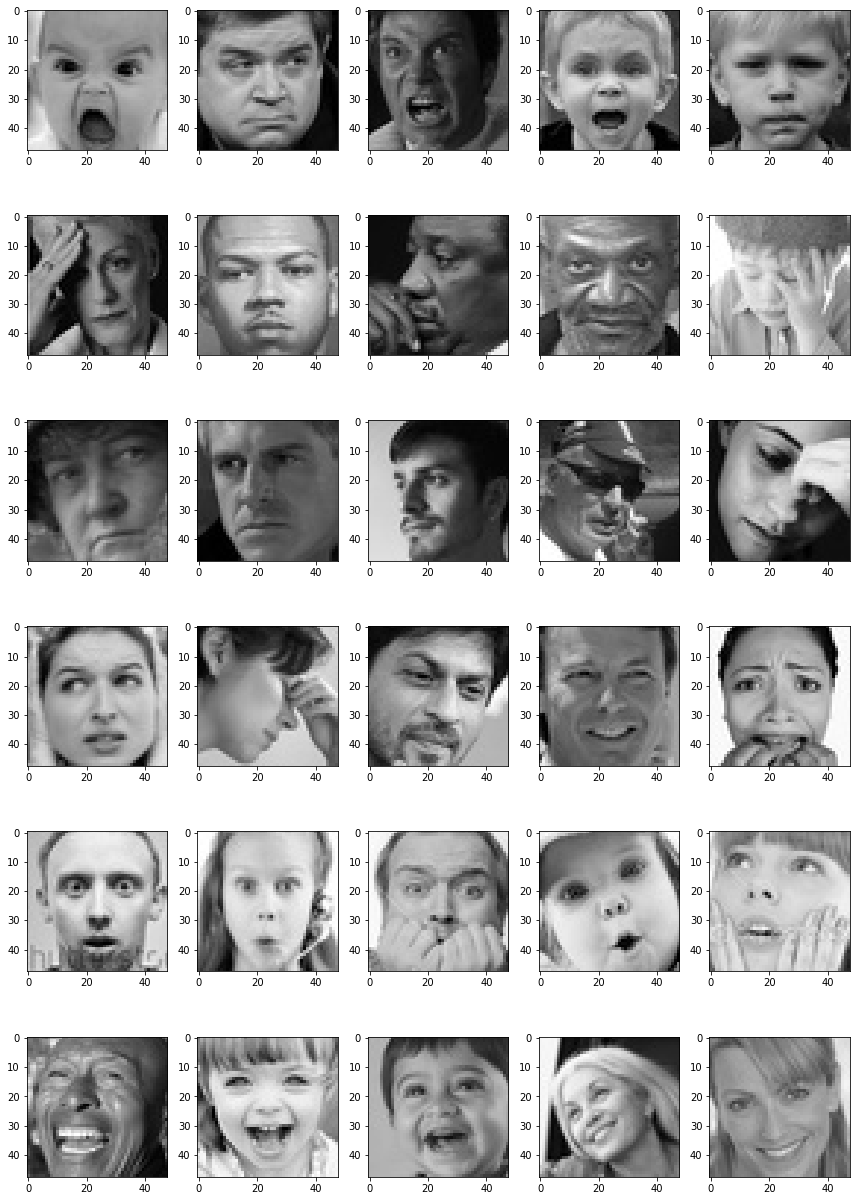

In [0]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img,img_to_array
# size of the image: 48*48 pixels
pic_size = 48
# input path for the images
#base_path = "C:/Users/SANDY/DL Projects/Emotions/fer2013/fer2013/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_dir):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_dir + expression + "/" +os.listdir(base_dir + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
#datagen_validation = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(base_dir,
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 28273 images belonging to 6 classes.


In [0]:
from keras.layers import Dense
from keras.layers import Dropout,Input
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.models import Model,Sequential
from keras.optimizers import Adam

In [0]:
#No. of possible label values
nb_classes = 6
#Initialising the CNN
model = Sequential()
#1
model.add(Conv2D(64,(3,3), padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2
model.add(Conv2D(128,(5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#3
model.add(Conv2D(512,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#4
model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Flattening
model.add(Flatten())

#Full connected layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Full connected layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation = 'softmax'))

opt = Adam(lr = 0.0001)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

In [0]:
#Training

In [0]:
# number of epochs to train the NN
epochs = 200
from keras.callbacks import ModelCheckpoint

#checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]
#steps per epoch = 28273/128 = 220
history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs = epochs,
                                verbose = 1)

In [0]:
#5:06-5:16

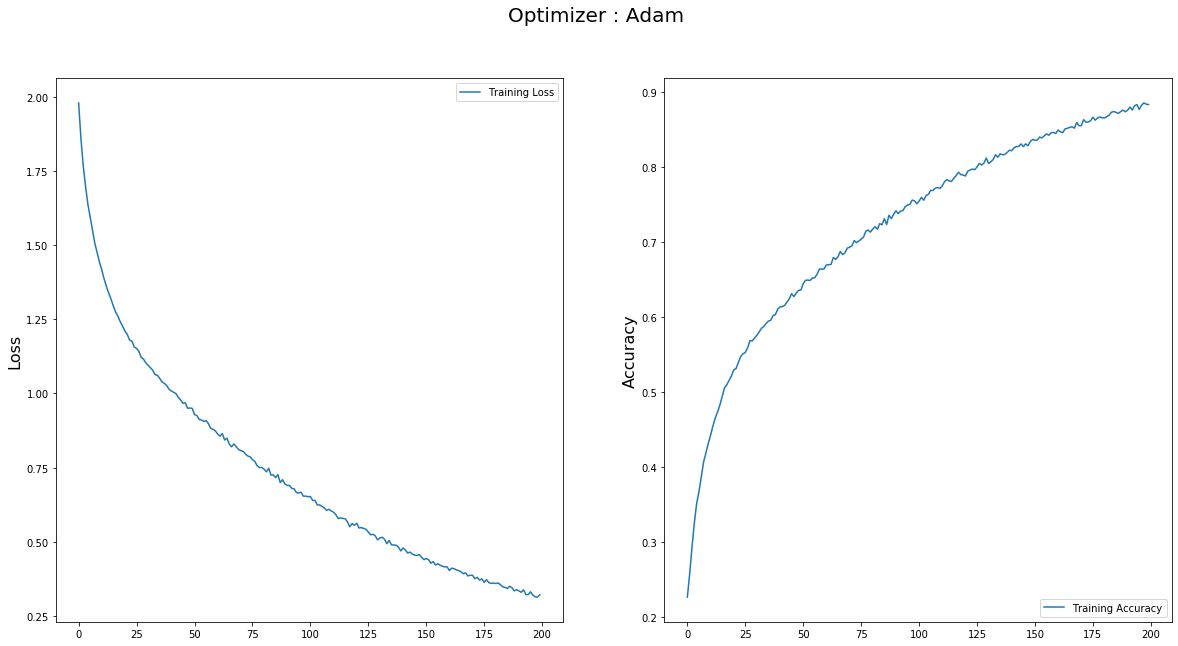

In [0]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=20)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
#########################################################################
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
#plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
# create on Colab directory
model.save('model.h5')   

#Saving in DRIVE
#From Deep lizard

model_file = drive.CreateFile({'title' : 'model.h5'})
model_file.SetContentFile('model1.h5')
model_file.Upload()

In [0]:
from keras.models import load_model
new_model = load_model('model.h5')

In [0]:
model_test = keras.models.load_model("model.h5")

In [0]:
# download to google drive
#drive.CreateFile({'id': model_file.get('id')})

In [0]:
#model.save_weights('model_weights.h5')
#weights_file = drive.CreateFile({'title' : 'model_weights.h5'})
#weights_file.SetContentFile('model_weights.h5')
#weights_file.Upload()
#drive.CreateFile({'id': weights_file.get('id')})

In [0]:
# 3. reload weights from google drive into the model

# use (get shareable link) to get file id
#last_weight_file = drive.CreateFile({'id': '1i_6BpxqgNbMjmbw6ML1mnBjoYi_LuO4Y'}) 
#last_weight_file.GetContentFile('last_weights.mat')
#model.load_weights('last_weights.mat')

In [0]:
#new_model.summary()

In [0]:
#new_model.get_weights()

In [0]:
#json_string = model.to_json()
#yaml_string = model.to_yaml()
#from keras.models import model_from_json
#model_architecture = model_from_json(json_string)
#model_architecture.summary()

In [0]:
#model.save_weights('my_model_weights.h5')
#Go to deeplizard